#### Problem Definition/Goal Identification

Goal: Train a model that predicts whether someone is diabetic

#### Data Ingestion

##### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# for scaling the data
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [2]:
# read data
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Analysis of the Dataset

In [3]:
# get information about the features/properties
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# get all stastical analysis of the dataset
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
relevant_statistical_analysis = diabetes.describe().drop(['count', 'std','25%','50%','75%'], axis='rows')
relevant_statistical_analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Metric-by-metric validation

1. Glucose (Plasma glucose concentration)
- Zero value possible? No
- Why: Glucose is essential for brain function. A true value of 0 mg/dL is incompatible with life.
- Realistic human minimum: ~40 mg/dL (2.2 mmol/L) 
2. Blood Pressure (Diastolic)
- Zero value possible? No
- Why: Blood pressure of 0 mmHg means no circulation.
- Realistic human minimum: ~40–50 mmHg (diastolic)
3. Skin Thickness (Triceps skinfold)
- Zero value possible? No
- Why: Humans always have subcutaneous tissue.
- Realistic human minimum: ~5 mm. Athletes or extremely lean individuals may approach this, but never 0
4. Insulin (Serum insulin)
- Zero value possible? No
- Why: Even in Type 1 diabetes, there is usually some detectable insulin unless lab limits truncate it.
- Realistic human minimum: ~2–3 μU/mL
- Some datasets record 0 when insulin is not measured
5. BMI (Body Mass Index)
- Zero value possible? No
- Why: BMI is derived from weight and height; 0 would imply no mass.
- Realistic human minimum: ~10–12 kg/m² → extreme starvation


In [6]:
# checking pregnancy frequency distribution
diabetes['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

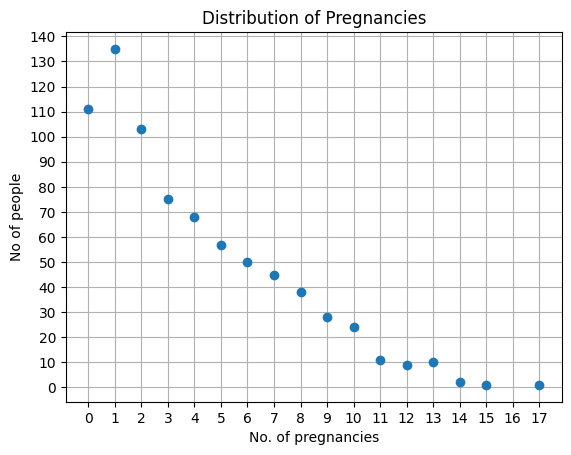

In [41]:
diabetes_features = list(diabetes.columns)
plt.plot(diabetes['Pregnancies'].value_counts(),'o')
plt.title("Distribution of Pregnancies")
plt.xlabel("No. of pregnancies")
plt.ylabel("No of people")
plt.xticks(np.arange(0,diabetes['Pregnancies'].max()+1, 1))
plt.yticks(np.arange(0,diabetes['Pregnancies'].value_counts()[1]+10, 10))
plt.grid(True)
plt.savefig("Pregnancy Frequency Line Graph")
plt.show()

#### Data Pre-processing
Notes: Humans can't have zero, blood pressure, skin thickness, insulin levels, and BMI

In [8]:
# checking for null values

# replace zero with NaN where zero is an invalid output (refer to metric-by-metric validation section)
dataset_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes[dataset_columns] = diabetes[dataset_columns].replace(0, np.nan)

# checking for columns with null values
diabetes.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### The plan is to compare results of each model based on the type of dataset they will be trained on

In [9]:
# creating a dataframe where all null values from "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" are dropped
diabetes_drop_nan = diabetes.dropna()
diabetes_drop_nan.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

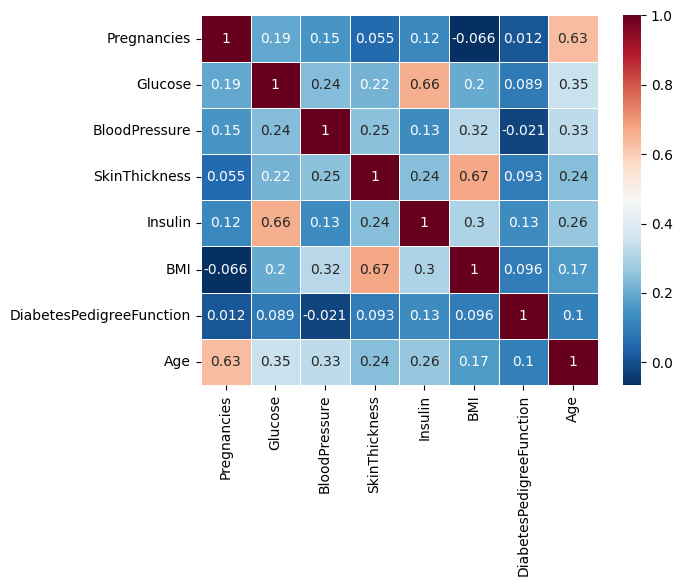

In [10]:
# correlation analysis
# There's no need to drop any feature in my view, as all of them have a correlation value below 0.7
diabetes_drop_nan_features = diabetes_drop_nan.drop('Outcome', axis=1)
pearsonCorrelation = diabetes_drop_nan_features.corr(method='spearman', numeric_only=True)

sb.heatmap(pearsonCorrelation,
           xticklabels=pearsonCorrelation.columns,
           yticklabels=pearsonCorrelation.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

In [11]:
# replacing null values in "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" with mean
diabetes_swap_for_mean = diabetes.copy()

for column in dataset_columns:
    diabetes_swap_for_mean[column] = diabetes_swap_for_mean[column].fillna(diabetes_swap_for_mean[column].mean())

diabetes_swap_for_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# replacing null values in "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" with median
diabetes_swap_for_median = diabetes.copy()

for column in dataset_columns:
    diabetes_swap_for_median[column] = diabetes_swap_for_median[column].fillna(diabetes_swap_for_median[column].median())

diabetes_swap_for_median.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Segragation

In [13]:
# separate features from target/outcome feature
X = diabetes_drop_nan_features
print("======================================================================")
print(X)
print("======================================================================")
# assign target to y
y = diabetes_drop_nan['Outcome']
print("======================================================================")
print(y)
print("======================================================================")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  
3                       0.167   21  
4                       2.288   33  


In [14]:
# train, test, split
X_train, X_test, Y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print("X_train Shape:", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", Y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape: (313, 8)
X_test Shape:  (79, 8)
y_train Shape:  (313,)
y_test Shape:  (79,)


##### Feature Scaling

Importance: Many machine learning algorithms are sensitive to the scale of the input features e.g. Algorithms that rely on distance metrics (like KNN and SVM) or gradient-based optimization (like Logistic Regression and Gradient Boosting) can be affected by features with different scales.
<br>
<br>
Impact of Unscaled Features: If features like Glucose (values in the range of 0-200) and BMI (values in the range of 0-70) are not scaled, the model may give more importance to features with larger ranges, leading to biased results.
<br>
<br>
Standardization or Normalization: Scaling ensures that all features contribute equally to the model. Standardization (z-score normalization) or Min-Max scaling are common techniques.
<br>
<br>
Tree-Based Models: Models like Decision Trees and Random Forests are not sensitive to feature scaling, so scaling is not strictly necessary for them.

In [15]:
# scaling the features
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

#### Model Training

##### Logistic Regression

In [16]:
# model training - LR
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, Y_train)

/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/leesangoroh/Documents/GitHub/AIFoundations/.venv/lib/python3.9/site-packages/sklearn

LogisticRegression(max_iter=1000)

In [17]:
ylrpredicted = lr.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, ylrpredicted)
print(cm_lr)

[[45  9]
 [ 8 17]]


<Axes: >

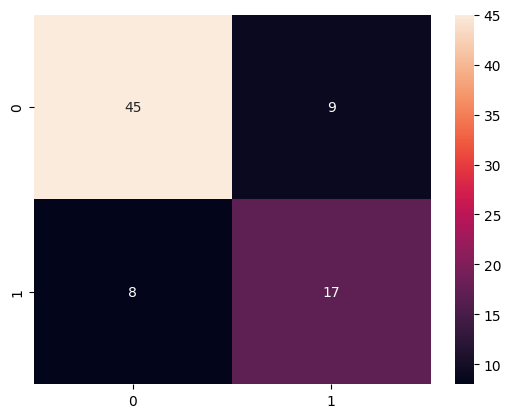

In [18]:
sb.heatmap(cm_lr, annot=True)

##### SVM

In [19]:
# questions - how do I choose the best kernel? 

svm = SVC(kernel='poly')
# svm=SVC(kernel='rbf')#default
# svm = SVC(kernel='linear')
svm.fit(X_train_scaled, Y_train)

SVC(kernel='poly')

In [20]:
ysvmpredicted = svm.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, ysvmpredicted)
print(cm_svm)

[[46  8]
 [11 14]]


<Axes: >

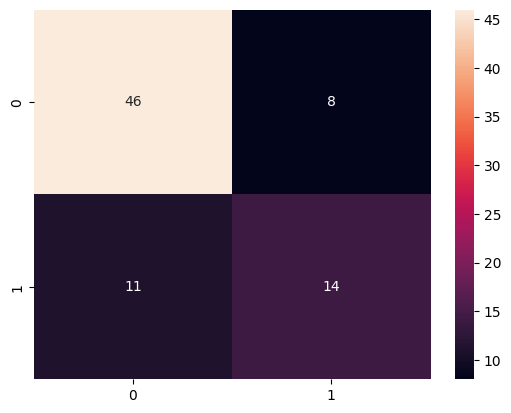

In [21]:
sb.heatmap(cm_svm, annot=True)

##### Decision Tree

In [22]:
# question - how does max_depth and entropy affect how a model trains
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [23]:
ydtpredicted = dt.predict(X_test_scaled)
dt_cm = confusion_matrix(y_test, ydtpredicted)
print(dt_cm)

[[41 13]
 [ 9 16]]


<Axes: >

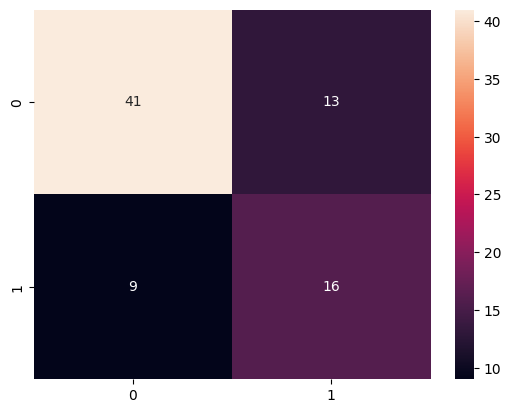

In [24]:
sb.heatmap(dt_cm, annot=True)

##### KNN

In [25]:
k=2
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
yknnpredicted = KNN.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, yknnpredicted)
print(knn_cm)

[[49  5]
 [10 15]]


<Axes: >

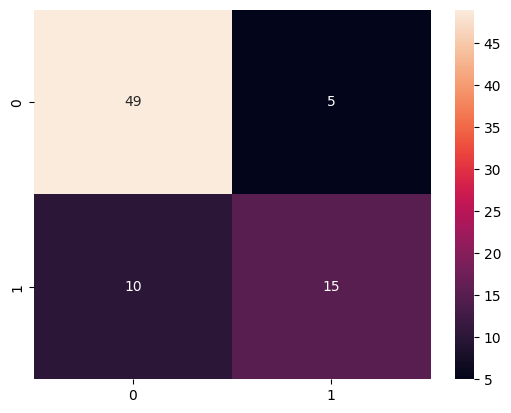

In [27]:
sb.heatmap(knn_cm, annot=True)

##### Random Forest

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [29]:
yrfpredicted = rf.predict(X_test_scaled)
rf_cm = confusion_matrix(y_test, yrfpredicted)
print(rf_cm)

[[42 12]
 [ 4 21]]


<Axes: >

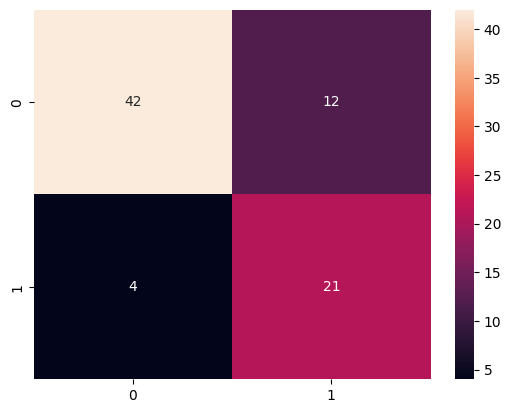

In [30]:
sb.heatmap(rf_cm, annot=True)

##### Gradient Boosting

In [31]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, Y_train)

GradientBoostingClassifier()

In [32]:
ygbpredicted = gb.predict(X_test_scaled)
gb_cm = confusion_matrix(y_test, ygbpredicted)
print(gb_cm)


[[41 13]
 [ 9 16]]


<Axes: >

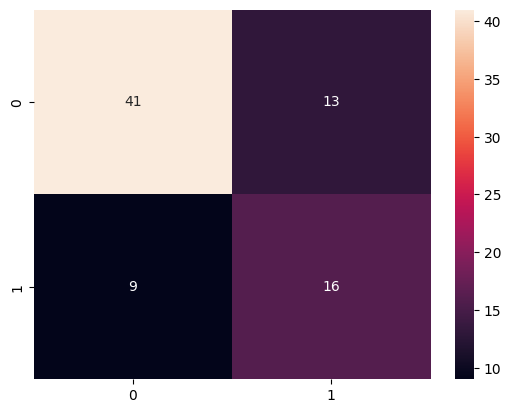

In [33]:
sb.heatmap(gb_cm, annot=True)

#### Model Evaluation

##### LR Model Performance

In [34]:
# LR model performance
print(classification_report(y_test, ylrpredicted))
print("Accuracy:", accuracy_score(y_test, ylrpredicted))
print("F1_score:",f1_score(y_test, ylrpredicted, average='weighted'))
F1_LR=f1_score(y_test, ylrpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.65      0.68      0.67        25

    accuracy                           0.78        79
   macro avg       0.75      0.76      0.75        79
weighted avg       0.79      0.78      0.79        79

Accuracy: 0.7848101265822784
F1_score: 0.785914271067471


##### SVM Model Performance

In [35]:
print(classification_report(y_test, ysvmpredicted))
print("Accuracy:", accuracy_score(y_test, ysvmpredicted))
print("F1_score:",f1_score(y_test, ysvmpredicted, average='weighted'))
F1_svm=f1_score(y_test, ysvmpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        54
           1       0.64      0.56      0.60        25

    accuracy                           0.76        79
   macro avg       0.72      0.71      0.71        79
weighted avg       0.75      0.76      0.76        79

Accuracy: 0.759493670886076
F1_score: 0.7550680225067513


##### DT Model Performance

In [36]:
print(classification_report(y_test, ydtpredicted))
print("Accuracy:", accuracy_score(y_test, ydtpredicted))
print("F1_score:",f1_score(y_test, ydtpredicted, average='weighted'))
F1_tree=f1_score(y_test, ydtpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        54
           1       0.55      0.64      0.59        25

    accuracy                           0.72        79
   macro avg       0.69      0.70      0.69        79
weighted avg       0.74      0.72      0.73        79

Accuracy: 0.7215189873417721
F1_score: 0.7264776948321252


##### kNN Model Performance

In [37]:
print(classification_report(y_test, yknnpredicted))
print("Accuracy:", accuracy_score(y_test, yknnpredicted))
print("F1_score:",f1_score(y_test, yknnpredicted, average='weighted'))
F1_knn=f1_score(y_test, yknnpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        54
           1       0.75      0.60      0.67        25

    accuracy                           0.81        79
   macro avg       0.79      0.75      0.77        79
weighted avg       0.81      0.81      0.80        79

Accuracy: 0.810126582278481
F1_score: 0.8037787984018521


##### RF Model Performance

In [38]:
print(classification_report(y_test, yrfpredicted))
print("Accuracy:", accuracy_score(y_test, yrfpredicted))
print("F1_score:",f1_score(y_test, yrfpredicted, average='weighted'))
F1_rf=f1_score(y_test, yrfpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.64      0.84      0.72        25

    accuracy                           0.80        79
   macro avg       0.77      0.81      0.78        79
weighted avg       0.83      0.80      0.80        79

Accuracy: 0.7974683544303798
F1_score: 0.8033347883020514


##### GB Model Performance

In [39]:
print(classification_report(y_test, ygbpredicted))
print("Accuracy:", accuracy_score(y_test, ygbpredicted))
print("F1_score:",f1_score(y_test, ygbpredicted, average='weighted'))
F1_GB=f1_score(y_test, ygbpredicted, average='weighted')

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        54
           1       0.55      0.64      0.59        25

    accuracy                           0.72        79
   macro avg       0.69      0.70      0.69        79
weighted avg       0.74      0.72      0.73        79

Accuracy: 0.7215189873417721
F1_score: 0.7264776948321252


In [40]:
models = ['Logistic Regression', 'SVM','Decision Tree','KNN','Random Forest','Gradient boosted tree']
F1_score = [F1_LR, F1_svm, F1_tree, F1_knn,F1_rf,F1_GB]
compare_models = pd.DataFrame({ 'Algorithms': models, 'F1 Score': F1_score })
compare_models.sort_values(by = 'F1 Score', ascending = False)

,Algorithms,F1 Score
3,KNN,0.803779
4,Random Forest,0.803335
0,Logistic Regression,0.785914
1,SVM,0.755068
2,Decision Tree,0.726478
5,Gradient boosted tree,0.726478
